# 成功する投資：トレーディングのサイエンス
- [Qiita URL](https://qiita.com/blog_UKI/items/f782fb86747e0bae89a9)

記事中の `yfinance` のバグは直っているようだ。

## 計量的・実証的トレーディングの準備
さて、それではまずデータを集めます。データはYahoo FinanceのAPIを使って集めます。

In [ ]:
#!pip install yfinance

## ライブラリ読み込み

In [ ]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## 価格のヒストリカルデータ
では、まず日本の株式市場の銘柄について、価格データをダウンロードしてみましょう。

以下のコードを実行すると、一瞬で7203トヨタ自動車のヒストリカルデータを取得することができます。日本市場の銘柄のtickerシンボルは、証券コード+".T"で表されるため、特にYahoo Financeのシンボルを調べなくとも簡単にほぼ全ての銘柄のデータを取得することができます。

In [ ]:
ticker = yf.Ticker("7203.T")
ticker.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-05-06,2211.686623,2287.733154,2186.337779,2287.733154,3115000,0.0,0
1999-05-07,2275.058684,2281.395895,2186.337733,2205.349365,3033000,0.0,0
1999-05-10,2205.349418,2230.698262,2186.337785,2199.012207,1261000,0.0,0
1999-05-11,2218.023753,2230.698174,2180.000488,2180.000488,1686000,0.0,0
1999-05-12,2180.000419,2218.023682,2180.000419,2218.023682,2596000,0.0,0
...,...,...,...,...,...,...,...
2021-06-07,9953.000000,9971.000000,9865.000000,9917.000000,6374000,0.0,0
2021-06-08,9838.000000,9899.000000,9785.000000,9856.000000,5378900,0.0,0
2021-06-09,9836.000000,9950.000000,9814.000000,9906.000000,4428100,0.0,0


## 損益計算書
続いて財務諸表のデータを見てみましょう。まずは損益計算書からです。

以下のコードから直近およそ3年分の損益計算書を取得できます。この中で特に重要なのは、Total Revenue(売上高)、Operating Income(営業利益)、Net Income(当期純利益)でしょうか。

In [ ]:
ticker.financials

,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,2932355000000.0,2825759000000.0,2645531000000.0,3090512000000.0
Minority Interest,883782000000.0,677064000000.0,718985000000.0,694120000000.0
Net Income,2245261000000.0,2076183000000.0,1882873000000.0,2493983000000.0
Selling General Administrative,2634625000000.0,2973166000000.0,2986695000000.0,3090495000000.0
Gross Profit,4832373000000.0,5407628000000.0,5443896000000.0,5490357000000.0
Ebit,2197748000000.0,2434462000000.0,2457201000000.0,2399862000000.0
Operating Income,2197748000000.0,2434462000000.0,2457201000000.0,2399862000000.0
Other Operating Expenses,None,None,None,None


## 貸借対照表（バランスシート）
次は貸借対照表です。

以下のコードから直近およそ3年分の貸借対照表を取得できます。この中で特に重要なのは、Total Assets(総資産)、Total Liab(総負債)、Total Stockholder Equity(自己資本)でしょうか。

In [ ]:
ticker.balance_sheet

,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Intangible Assets,1.108634e+12,NaN,NaN,NaN
Capital Surplus,4.972750e+11,4.893340e+11,4.871620e+11,4.875020e+11
Total Liab,3.797881e+13,3.194275e+13,3.186981e+13,3.087815e+13
Total Stockholder Equity,2.340455e+13,2.006062e+13,1.934815e+13,1.873598e+13
Minority Interest,8.837820e+11,6.770640e+11,7.189850e+11,6.941200e+11
Other Current Liab,3.717174e+12,4.102642e+12,4.479344e+12,4.399669e+12
Total Assets,6.226714e+13,5.268044e+13,5.193695e+13,5.030825e+13
Common Stock,3.970500e+11,3.970500e+11,3.970500e+11,3.970500e+11
Other Current Assets,7.450700e+11,2.469880e+11,1.425310e+11,2.022920e+11
Retained Earnings,2.410418e+13,2.342761e+13,2.198752e+13,1.947346e+13


## キャッシュフロー計算書
財務諸表の最後はキャッシュフロー計算書です。

以下のコードから直近およそ3年分のキャッシュフロー計算書を取得できます。この中で特に重要なのは、Total Cashflows From Operating Activities(営業キャッシュフロー)、Total Cashflows From Financing Activities(財務キャッシュフロー)、Total Cashflows From Investing Activities(投資キャッシュフロー)でしょうか。

In [ ]:
ticker.cashflow

,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Investments,-6.672530e+11,2.334300e+11,6.166420e+11,-3.322730e+11
Change To Liabilities,3.841420e+11,-7.641000e+10,9.488700e+10,4.664800e+10
Total Cashflows From Investing Activities,-4.684175e+12,-3.150861e+12,-2.697241e+12,-3.660092e+12
Net Borrowings,3.201402e+12,1.558199e+12,7.229710e+11,6.893390e+11
Total Cash From Financing Activities,2.739174e+12,3.971380e+11,-5.408390e+11,-4.491350e+11
Change To Operating Activities,-1.209962e+12,-2.703900e+11,4.084000e+11,4.857250e+11
Issuance Of Stock,1.998840e+11,1.998840e+11,1.998840e+11,1.998840e+11
Net Income,2.245261e+12,2.076183e+12,1.882873e+12,2.493983e+12
Change In Cash,1.002406e+12,7.056750e+11,4.868760e+11,7.031300e+10
Effect Of Exchange Rate,2.202450e+11,-1.312450e+11,-4.164100e+10,-4.358800e+10


## 銘柄のサマリー
最後に銘柄のサマリーの入手方法です。

以下のコードからその銘柄の基本情報を取得できます。この中で特に重要なのは、marketCap(時価総額)、sharesOutstanding(発行株数)、forwardPE(予測PER)、dividendYield(配当利回り)、profitMargins(純利益比率)など、様々なものがあります。

In [ ]:
ticker.info

{'zip': '471-8571',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 366283,
 'longBusinessSummary': 'Toyota Motor Corporation designs, manufactures, assembles, and sells passenger vehicles, minivans and commercial vehicles, and related parts and accessories. It operates in Automotive, Financial Services, and All Other segments. The company offers hybrid cars under the Prius, Prius PHV, C-HR, LC HV, LS HV, Camry, JPN TAXI, Avalon, Crown, Century HV, UX HV, Corolla SD, Corolla Sport, and WG HV names; fuel cell vehicles under the MIRAI and SORA names; and conventional engine vehicles, including subcompact and compact cars under the Yaris, Aqua, Passo, Roomy, Tank, Etios, Vios, AGYA, Rush, GLANZA, and Raize names. It also provides mini-vehicles, passenger vehicles, commercial vehicles, and auto parts under the Toyota name; mid-size cars under the Camry and REIZ names; luxury cars under the Lexus, Avalon, and Crown names; Century limousines; sports cars under the LC and Supra names; a

## 複数銘柄の取得
複数銘柄を同時に取得する場合はTickersクラスを使い、引数はスペースで区切ります。

In [ ]:
tickers = yf.Tickers("7203.T 9984.T 6861.T")
tickers.tickers["7203.T"].history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-11,8471.0,8503.0,8301.0,8341.0,5502300,0,0
2021-05-12,8340.0,8567.0,8184.0,8523.0,12524300,0,0
2021-05-13,8500.0,8535.0,8375.0,8392.0,7210100,0,0
2021-05-14,8449.0,8516.0,8341.0,8478.0,5915300,0,0
2021-05-17,8580.0,8676.0,8549.0,8648.0,6756300,0,0
2021-05-18,8700.0,8869.0,8699.0,8819.0,9195700,0,0
2021-05-19,8750.0,8798.0,8680.0,8699.0,6621700,0,0
2021-05-20,8680.0,8705.0,8623.0,8665.0,3754500,0,0
2021-05-21,8703.0,8773.0,8673.0,8743.0,5156700,0,0


In [ ]:
tickers = yf.Tickers("7203.T 9984.T 6861.T")
hists = [ticker.history(period="max") for ticker in tickers.tickers.values()]
hists[0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-05-06,2211.686623,2287.733154,2186.337779,2287.733154,3115000,0.0,0
1999-05-07,2275.058684,2281.395895,2186.337733,2205.349365,3033000,0.0,0
1999-05-10,2205.349418,2230.698262,2186.337785,2199.012207,1261000,0.0,0
1999-05-11,2218.023753,2230.698174,2180.000488,2180.000488,1686000,0.0,0
1999-05-12,2180.000419,2218.023682,2180.000419,2218.023682,2596000,0.0,0
...,...,...,...,...,...,...,...
2021-06-07,9953.000000,9971.000000,9865.000000,9917.000000,6374000,0.0,0
2021-06-08,9838.000000,9899.000000,9785.000000,9856.000000,5378900,0.0,0
2021-06-09,9836.000000,9950.000000,9814.000000,9906.000000,4428100,0.0,0


## 株価以外のデータ取得（為替）
Yahoo Financeに存在するティッカーであれば、株式銘柄でなくともデータを取得することができます。一例として為替のデータを取得してみましょう。

In [ ]:
fxs = ["JPY=X", "EURUSD=X", "GBPUSD=X"]
tickers = yf.Tickers(" ".join(fxs))
closes = [ticker.history(period="max").Close for ticker in tickers.tickers.values()]
print(type(closes[0]))
closes[0].index

<class 'pandas.core.series.Series'>


DatetimeIndex(['1996-10-30', '1996-11-01', '1996-11-04', '1996-11-05',
               '1996-11-06', '1996-11-08', '1996-11-11', '1996-11-12',
               '1996-11-13', '1996-11-15',
               ...
               '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
               '2021-06-04', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11'],
              dtype='datetime64[ns]', name='Date', length=6360, freq=None)

In [ ]:
fxs = ["JPY=X", "EURUSD=X", "GBPUSD=X"]
tickers = yf.Tickers(" ".join(fxs))
closes = [ticker.history(period="max").Close for ticker in tickers.tickers.values()]
df = pd.DataFrame(closes).T
df.columns = fxs
df

,JPY=X,EURUSD=X,GBPUSD=X
Date,,,
1996-10-30,114.180000,NaN,NaN
1996-11-01,113.500000,NaN,NaN
1996-11-04,113.879997,NaN,NaN
1996-11-05,114.250000,NaN,NaN
1996-11-06,113.949997,NaN,NaN
...,...,...,...
2021-06-07,109.616997,1.216841,1.416431
2021-06-08,109.274002,1.219363,1.417656
2021-06-09,109.469002,1.217285,1.414988


## 世界の主要株価指数
以下、世界の主要株価指数の取得方法です。ここに挙げたもの以外でも取れる指標はあります。ご自身でYahoo Financeで探してみることをお勧めします。

In [ ]:
indices = ["^N225", "^DJI", "^GSPC", "^IXIC", "^GDAXI", "^FTSE", "^FCHI", "^HSI", "^SSEC", "^BVSP", "^KOSPI"]
# 以下、省略

# 計量的・実証的トレーディングの実行
では例題として本記事の問題提起で挙げた、割安でクオリティが高いと考えられる株（PERが10倍以下、ROEが10%以上）への投資したときのリターンの検証方法について、プログラムを元に解説します。なお、筆者のプログラミング能力は学生未満ですので、お見苦しい記述があるかと思います。コーディングに関する指摘があればコメント頂けると助かります。

## 銘柄リストの読み込み
まず東証の銘柄リストをCSVで準備します。東証の上場銘柄一覧は[こちら](https://www.jpx.co.jp/markets/statistics-equities/misc/01.html)から取得できますので検証したい銘柄をピックアップしてください。この例題では、TOPIXの中でも比較的大型であるTOPIX500構成銘柄を対象としました。

In [ ]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

data = pd.read_excel("https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls")
print(data)

            日付   コード  ... 規模コード           規模区分
0     20210531  1301  ...     7  TOPIX Small 2
1     20210531  1305  ...     -              -
2     20210531  1306  ...     -              -
3     20210531  1308  ...     -              -
4     20210531  1309  ...     -              -
...        ...   ...  ...   ...            ...
4103  20210531  9993  ...     7  TOPIX Small 2
4104  20210531  9994  ...     7  TOPIX Small 2
4105  20210531  9995  ...     7  TOPIX Small 2
4106  20210531  9996  ...     -              -
4107  20210531  9997  ...     6  TOPIX Small 1

[4108 rows x 10 columns]


列名を変えます。

In [ ]:
data = data.rename(columns={"日付": "date", "コード": "code", "銘柄名": "brandname", "市場・商品区分": "segment", "33業種コード": "33industorycode", "33業種区分": "33industrysegment", "17業種コード": "17industrycode", "17業種区分": "17industrysegment", "規模コード": "scalecode", "規模区分": "scalesegment"})

TOPIX の Mid400 だけ切り出しましょう。

In [ ]:
print(data.scalesegment.unique())
data = data.loc[data.scalesegment == "TOPIX Mid400"].reset_index()

['TOPIX Small 2' '-' 'TOPIX Mid400' 'TOPIX Small 1' 'TOPIX Large70'
 'TOPIX Core30']


## ティッカーの設定
yfinanceのtickerを設定します。上記の銘柄にマーケットデータである日経平均も加えておきます。

In [ ]:
stocks = [str(s)+".T" for s in data.code]
stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))

## 終値データフレームの作成
続いてyfinanceで価格系列のヒストリカルデータを入手し、その中から終値のデータをデータフレームにまとめます。

In [ ]:
# 終値
closes = [ticker.history(period="max").Close for ticker in tickers.tickers.values()]
closes = pd.DataFrame(closes).T   # DataFrame化
closes.columns = stocks           # カラム名の設定
closes = closes.ffill()           # 欠損データの補完
closes

,1332.T,1333.T,1414.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1820.T,1824.T,1860.T,1878.T,1883.T,1893.T,1911.T,1944.T,1951.T,1959.T,1963.T,2002.T,2127.T,2175.T,2181.T,2201.T,2206.T,2212.T,2229.T,2264.T,2267.T,2269.T,2270.T,2282.T,2331.T,2371.T,2412.T,2432.T,2433.T,2492.T,...,9101.T,9104.T,9142.T,9143.T,9201.T,9301.T,9364.T,9401.T,9404.T,9409.T,9435.T,9449.T,9501.T,9504.T,9505.T,9506.T,9507.T,9508.T,9509.T,9513.T,9532.T,9533.T,9601.T,9602.T,9613.T,9627.T,9684.T,9697.T,9706.T,9719.T,9744.T,9766.T,9783.T,9831.T,9832.T,9861.T,9962.T,9987.T,9989.T,^N225
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1965-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257.719971
1965-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1263.989990
1965-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1274.270020
1965-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1286.430054
1965-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1288.540039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,548.0,2448.0,4640.0,809.0,3170.0,3855.0,933.0,953.0,1560.0,1523.0,3390.0,999.0,775.0,11760.0,2240.0,797.0,2221.0,1877.0,2731.0,3450.0,1099.0,1666.0,2689.0,3050.0,2172.0,3475.0,4225.0,1621.0,2486.0,5720.0,5990.0,6660.0,2148.0,4500.0,5090.0,3440.0,3235.0,2161.0,1852.0,930.0,...,4845.0,4655.0,2727.0,2506.0,2611.0,3360.0,2208.0,1850.0,1337.0,1907.0,21540.0,2942.0,342.0,1026.0,617.0,871.0,739.0,866.0,505.0,1587.0,2044.0,5600.0,12680.0,4540.0,1724.0,6460.0,5640.0,3225.0,5350.0,6190.0,6160.0,6740.0,2546.0,524.0,1467.0,2031.0,3595.0,3400.0,3575.0,29019.240234
2021-06-08,561.0,2494.0,4650.0,801.0,3175.0,3780.0,926.0,937.0,1560.0,1488.0,3405.0,986.0,788.0,12000.0,2217.0,808.0,2188.0,1882.0,2740.0,3460.0,1076.0,1664.0,2653.0,3090.0,2198.0,3500.0,4280.0,1624.0,2483.0,5740.0,6080.0,6730.0,2193.0,4525.0,5150.0,3460.0,3370.0,2228.0,1860.0,929.0,...,4845.0,4655.0,2727.0,2506.0,2611.0,3360.0,2208.0,1850.0,1337.0,1907.0,21540.0,2942.0,342.0,1026.0,617.0,871.0,739.0,866.0,505.0,1587.0,2044.0,5600.0,12680.0,4540.0,1724.0,6460.0,5640.0,3225.0,5350.0,6190.0,6160.0,6740.0,2546.0,524.0,1467.0,2031.0,3595.0,3400.0,3575.0,28963.560547
2021-06-09,560.0,2513.0,4670.0,821.0,3210.0,3770.0,946.0,941.0,1544.0,1484.0,3425.0,988.0,799.0,12310.0,2213.0,805.0,2169.0,1872.0,2739.0,3465.0,1087.0,1663.0,2661.0,318

## 当期純利益データフレームの作成
次に財務諸表データをデータフレームにまとめます。まずはPERとROEを算出するための当期純利益です。各銘柄の決算期が揃っていないためNAN値が多いように見えますが、必要な箇所にはちゃんとデータが入っていますのでご安心ください。

In [ ]:
earnings = [] # 当期純利益
dummy_key = list(tickers.tickers.keys())[0]
dummy = tickers.tickers[dummy_key].financials.T["Net Income"]
dummy[:] = np.nan

for ticker in tickers.tickers.values():
    try:
        earnings.append(ticker.financials.T["Net Income"])
    except:
        earnings.append(dummy)       # エラー発生時はダミーを入れる

earnings = pd.DataFrame(earnings).T  # DataFrame化
earnings.columns = stocks            # カラム名の設定
earnings

,1332.T,1333.T,1414.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1820.T,1824.T,1860.T,1878.T,1883.T,1893.T,1911.T,1944.T,1951.T,1959.T,1963.T,2002.T,2127.T,2175.T,2181.T,2201.T,2206.T,2212.T,2229.T,2264.T,2267.T,2269.T,2270.T,2282.T,2331.T,2371.T,2412.T,2432.T,2433.T,2492.T,...,9101.T,9104.T,9142.T,9143.T,9201.T,9301.T,9364.T,9401.T,9404.T,9409.T,9435.T,9449.T,9501.T,9504.T,9505.T,9506.T,9507.T,9508.T,9509.T,9513.T,9532.T,9533.T,9601.T,9602.T,9613.T,9627.T,9684.T,9697.T,9706.T,9719.T,9744.T,9766.T,9783.T,9831.T,9832.T,9861.T,9962.T,9987.T,9989.T,^N225
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,1.421600e+10,1.544600e+10,NaN,NaN,1.448500e+10,9.056600e+10,9.450100e+10,9.894600e+10,5.876200e+10,1.048570e+11,1.921000e+10,2.394100e+10,4.209100e+10,8.216800e+10,1.792200e+10,1.527100e+10,NaN,NaN,1.378900e+10,NaN,-2.205700e+10,1.946600e+10,NaN,NaN,1.782000e+10,1.111500e+10,NaN,NaN,1.860500e+10,1.320200e+10,3.015400e+10,6.078600e+10,1.298800e+10,3.500400e+10,1.833000e+10,1.483800e+10,3.855000e+09,3.082600e+10,2.588000e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.886000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838700e+10,2.130800e+10,2.331200e+10,NaN
2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30,NaN,NaN,6.997000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 自己資本データフレームの作成
次はROEを算出するための自己資本です。

In [ ]:
equity   = [] # 自己資本

dummy = tickers.tickers[dummy_key].balance_sheet.T["Total Stockholder Equity"]
dummy[:] = np.nan

for ticker in tickers.tickers.values():
    try:
        equity.append(ticker.balance_sheet.T["Total Stockholder Equity"])
    except:
        equity.append(dummy)         # エラー発生時はダミーを入れる

equity = pd.DataFrame(equity).T      # DataFrame化
equity.columns = stocks              # カラム名の設定
equity

,1332.T,1333.T,1414.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1820.T,1824.T,1860.T,1878.T,1883.T,1893.T,1911.T,1944.T,1951.T,1959.T,1963.T,2002.T,2127.T,2175.T,2181.T,2201.T,2206.T,2212.T,2229.T,2264.T,2267.T,2269.T,2270.T,2282.T,2331.T,2371.T,2412.T,2432.T,2433.T,2492.T,...,9101.T,9104.T,9142.T,9143.T,9201.T,9301.T,9364.T,9401.T,9404.T,9409.T,9435.T,9449.T,9501.T,9504.T,9505.T,9506.T,9507.T,9508.T,9509.T,9513.T,9532.T,9533.T,9601.T,9602.T,9613.T,9627.T,9684.T,9697.T,9706.T,9719.T,9744.T,9766.T,9783.T,9831.T,9832.T,9861.T,9962.T,9987.T,9989.T,^N225
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,NaN,1.006630e+11,NaN,NaN,2.022960e+11,5.687780e+11,5.941590e+11,5.717730e+11,2.378480e+11,5.485320e+11,1.678030e+11,1.905440e+11,2.239580e+11,2.731620e+11,1.933130e+11,9.637600e+10,NaN,NaN,1.580910e+11,NaN,3.822150e+11,3.937950e+11,NaN,NaN,1.391190e+11,8.916000e+10,NaN,NaN,1.281320e+11,1.422350e+11,3.435030e+11,4.489010e+11,1.431790e+11,4.041260e+11,1.966230e+11,3.517500e+10,1.468200e+10,2.296660e+11,3.049890e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.228110e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.552040e+11,3.959430e+11,1.363350e+11,NaN
2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30,NaN,NaN,6.924400e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 発行株数データフレームの作成
PERを算出するためにはEPS（一株益）が必要です。EPSを算出するために発行株数データフレームを作ります。

In [ ]:
shares   = [] # 発行株数

for ticker in tickers.tickers.values():
    try:
        shares.append(ticker.info["sharesOutstanding"])
    except:
        shares.append(np.nan)        # エラー発生時はNAN値を入れる

shares = pd.Series(shares)           # Series化
shares.index = stocks                # インデックス名の設定
shares

1332.T    3.111410e+08
1333.T    5.262460e+07
1414.T    5.382810e+07
1605.T    1.460200e+09
1721.T    1.250380e+08
              ...     
9861.T    6.461090e+07
9962.T    2.842450e+08
9987.T    8.917480e+07
9989.T    1.169000e+08
^N225              NaN
Length: 398, dtype: float64

## EPS、ROEデータフレームの作成
当期純利益、自己資本、発行株数のデータからEPS、ROEデータフレームを作ります。

In [ ]:
eps = earnings/shares.values      # EPS
roe = earnings/equity             # ROE

eps = eps.ffill()                 # 欠損データの補完
roe = roe.ffill()

eps = eps.drop(["^N225"], axis=1) # ^N225カラムは削除しておく
roe = roe.drop(["^N225"], axis=1)

In [ ]:
eps

,1332.T,1333.T,1414.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1820.T,1824.T,1860.T,1878.T,1883.T,1893.T,1911.T,1944.T,1951.T,1959.T,1963.T,2002.T,2127.T,2175.T,2181.T,2201.T,2206.T,2212.T,2229.T,2264.T,2267.T,2269.T,2270.T,2282.T,2331.T,2371.T,2412.T,2432.T,2433.T,2492.T,...,9076.T,9101.T,9104.T,9142.T,9143.T,9201.T,9301.T,9364.T,9401.T,9404.T,9409.T,9435.T,9449.T,9501.T,9504.T,9505.T,9506.T,9507.T,9508.T,9509.T,9513.T,9532.T,9533.T,9601.T,9602.T,9613.T,9627.T,9684.T,9697.T,9706.T,9719.T,9744.T,9766.T,9783.T,9831.T,9832.T,9861.T,9962.T,9987.T,9989.T
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,45.689897,293.512920,NaN,NaN,115.844783,439.741123,131.681549,129.704515,212.473165,207.106526,351.172250,129.595052,137.270125,1200.693225,217.446968,53.512230,NaN,NaN,124.713969,NaN,-87.366220,65.480574,NaN,NaN,77.126500,220.869209,NaN,NaN,139.180849,266.749643,188.216651,419.011512,191.865925,342.709445,181.063861,72.073210,24.224714,252.552065,69.291795,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.773515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.687156,238.946429,199.418306
2017-04-30,45.689897,293.512920,NaN,NaN,115.844783,439.741123,131.681549,129.704515,212.473165,207.106526,351.172250,129.595052,137.270125,1200.693225,217.446968,53.512230,NaN,NaN,124.713969,NaN,-87.366220,65.480574,NaN,NaN,77.126500,220.869209,NaN,NaN,139.180849,266.749643,188.216651,419.011512,191.865925,342.709445,181.063861,72.073210,24.224714,252.552065,69.291795,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.773515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.687156,238.946429,199.418306
2017-05-15,45.689897,293.512920,NaN,NaN,115.844783,439.741123,131.681549,129.704515,212.473165,207.106526,351.172250,129.595052,137.270125,1200.693225,217.446968,53.512230,NaN,NaN,124.713969,NaN,-87.366220,65.480574,NaN,NaN,77.126500,220.869209,NaN,NaN,139.180849,266.749643,188.216651,419.011512,191.865925,342.709445,181.063861,72.073210,24.224714,252.552065,69.291795,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.773515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.687156,238.946429,199.418306
2017-05-20,45.689897,293.512920,NaN,NaN,115.844783,439.741123,131.681549,129.704515,212.473165,207.106526,351.172250,129.595052,137.270125,1200.693225,217.446968,53.512230,NaN,NaN,124.713969,NaN,-87.366220,65.480574,NaN,NaN,77.126500,220.869209,NaN,NaN,139.180849,266.749643,188.216651,419.011512,191.865925,342.709445,181.063861,72.073210,24.224714,252.552065,69.291795,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.773515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.687156,238.946429,199.418306
2017-05-31,45.689897,293.512920,NaN,NaN,115.844783,439.741123,131.681549,129.704515,212.473165,207.106526,351.172250,129.595052,137.270125,1200.693225,217.446968,53.512230,NaN,NaN,124.713969,NaN,-87.366220,65.480574,NaN,NaN,77.126500,220.869209,NaN,NaN,139.180849,266.749643,188.216651,419.011512,191.865925,342.709445,181.063861,72.073210,24.224714,252.552065,69.291795,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.773515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.687156,238.946429,199.418306
2017-06-30,45.689897,293.512920,129.987869,NaN,115.844783,439.741123,131.681549,129.704515,212.473165,207.106526,351.172250,129.595052,137.270125,1200.693225,217.446968,53.512230,NaN,NaN,124.71

In [ ]:
roe

,1332.T,1333.T,1414.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1820.T,1824.T,1860.T,1878.T,1883.T,1893.T,1911.T,1944.T,1951.T,1959.T,1963.T,2002.T,2127.T,2175.T,2181.T,2201.T,2206.T,2212.T,2229.T,2264.T,2267.T,2269.T,2270.T,2282.T,2331.T,2371.T,2412.T,2432.T,2433.T,2492.T,...,9076.T,9101.T,9104.T,9142.T,9143.T,9201.T,9301.T,9364.T,9401.T,9404.T,9409.T,9435.T,9449.T,9501.T,9504.T,9505.T,9506.T,9507.T,9508.T,9509.T,9513.T,9532.T,9533.T,9601.T,9602.T,9613.T,9627.T,9684.T,9697.T,9706.T,9719.T,9744.T,9766.T,9783.T,9831.T,9832.T,9861.T,9962.T,9987.T,9989.T
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,NaN,0.153443,NaN,NaN,0.071603,0.159229,0.159050,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.092710,0.158452,NaN,NaN,0.087222,NaN,-0.057708,0.049432,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.092818,0.087784,0.135411,0.090712,0.086617,0.093224,0.421834,0.262566,0.134221,0.084856,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118470,0.053816,0.170991
2017-04-30,NaN,0.153443,NaN,NaN,0.071603,0.159229,0.159050,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.092710,0.158452,NaN,NaN,0.087222,NaN,-0.057708,0.049432,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.092818,0.087784,0.135411,0.090712,0.086617,0.093224,0.421834,0.262566,0.134221,0.084856,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118470,0.053816,0.170991
2017-05-15,NaN,0.153443,NaN,NaN,0.071603,0.159229,0.159050,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.092710,0.158452,NaN,NaN,0.087222,NaN,-0.057708,0.049432,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.092818,0.087784,0.135411,0.090712,0.086617,0.093224,0.421834,0.262566,0.134221,0.084856,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118470,0.053816,0.170991
2017-05-20,NaN,0.153443,NaN,NaN,0.071603,0.159229,0.159050,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.092710,0.158452,NaN,NaN,0.087222,NaN,-0.057708,0.049432,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.092818,0.087784,0.135411,0.090712,0.086617,0.093224,0.421834,0.262566,0.134221,0.084856,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118470,0.053816,0.170991
2017-05-31,NaN,0.153443,NaN,NaN,0.071603,0.159229,0.159050,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.092710,0.158452,NaN,NaN,0.087222,NaN,-0.057708,0.049432,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.092818,0.087784,0.135411,0.090712,0.086617,0.093224,0.421834,0.262566,0.134221,0.084856,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118470,0.053816,0.170991
2017-06-30,NaN,0.153443,0.101048,NaN,0.071603,0.159229,0.159050,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.092710,0.158452,NaN,NaN,0.087222,NaN,-0.057708,0.049432,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.092818,0.087784,0.135411,0.090712,0.086617,0.093224,0.421834,0.262566,0.134221,0.084856,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118470,0.053816,0.170991
2017-08

## 終値データフレームの整形、および月次リターンデータフレームの作成
ここからはゴリ押しでデータ整形していきます。まず月次データ用にデータ整形し、それから月次リターンデータフレーム（マーケットリターンを差し引いたもの）を作ります。

In [ ]:
closes["month"] = closes.index.month                                      # 月カラムの作成
closes["end_of_month"] = closes.month.diff().shift(-1)                    # 月末フラグカラムの作成
closes = closes[closes.end_of_month != 0]                                 # 月末のみ抽出

monthly_rt = closes.pct_change().shift(-1)                                # 月次リターンの作成(ラグあり)
monthly_rt = monthly_rt.sub(monthly_rt["^N225"], axis=0)                  # マーケットリターン控除

closes = closes[closes.index > datetime.datetime(2017, 4, 1)]             # 2017年4月以降
monthly_rt = monthly_rt[monthly_rt.index > datetime.datetime(2017, 4, 1)]

closes = closes.drop(["^N225", "month", "end_of_month"], axis=1)          # 不要なカラムを削除
monthly_rt = monthly_rt.drop(["^N225", "month", "end_of_month"], axis=1)

In [ ]:
closes

,1332.T,1333.T,1414.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1820.T,1824.T,1860.T,1878.T,1883.T,1893.T,1911.T,1944.T,1951.T,1959.T,1963.T,2002.T,2127.T,2175.T,2181.T,2201.T,2206.T,2212.T,2229.T,2264.T,2267.T,2269.T,2270.T,2282.T,2331.T,2371.T,2412.T,2432.T,2433.T,2492.T,...,9076.T,9101.T,9104.T,9142.T,9143.T,9201.T,9301.T,9364.T,9401.T,9404.T,9409.T,9435.T,9449.T,9501.T,9504.T,9505.T,9506.T,9507.T,9508.T,9509.T,9513.T,9532.T,9533.T,9601.T,9602.T,9613.T,9627.T,9684.T,9697.T,9706.T,9719.T,9744.T,9766.T,9783.T,9831.T,9832.T,9861.T,9962.T,9987.T,9989.T
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-28,507.402832,3018.752197,2398.756104,952.878723,1939.276489,3816.897461,965.339600,1008.648621,1082.832642,1342.706909,2415.207031,950.853516,611.839294,13966.255859,1523.562622,509.528656,1556.420776,1588.247192,1519.184448,2906.606934,1845.584961,1616.970093,924.175354,1463.200439,1990.752319,4975.464844,5611.789551,2272.820312,3656.598389,4224.385254,6180.456543,8815.409180,3125.186279,5874.161621,4623.186523,1501.497559,818.808838,2246.900146,1260.785522,326.855530,...,1197.892334,2042.807983,3098.315430,3119.402344,NaN,3193.324463,2688.656982,1878.968262,1861.164429,1708.794556,1919.925781,9883.596680,1254.471436,433.0,1051.574341,1004.157959,1307.700684,1199.667480,1079.799683,760.064941,2282.079590,1919.701538,3819.081299,12639.624023,3086.308105,981.366760,7383.663574,3064.459961,566.675537,3766.766113,4202.291992,4184.403809,4446.754395,3114.758789,532.032288,1461.115234,1750.892700,2058.077637,3545.268066,3655.257324
2017-05-31,546.143250,3004.535156,2506.935303,908.289246,2143.988037,4247.982422,1093.039429,1052.995239,1196.904663,1509.436523,2594.111084,1109.328979,620.732361,14877.469727,1663.754028,568.250916,1610.279419,1598.603271,1659.916382,3575.262451,1589.385498,1730.507935,1061.225220,1509.064209,2075.202393,6231.132324,5975.074219,2220.571533,4032.597900,4464.406250,7632.960938,8442.663086,3148.684082,6439.341309,4922.530762,1473.466919,1013.591614,2305.261475,1361.128174,406.493011,...,1288.824585,1833.055298,2889.338135,3351.460693,NaN,2943.846191,2627.041748,2103.627441,1726.611206,1587.979980,1804.469604,10363.922852,1389.115967,454.0,1091.386963,1052.903564,1446.742798,1239.984985,1232.516724,795.766479,2596.362061,2011.707153,4092.214600,13474.972656,3163.585938,1133.222290,8521.819336,3350.858154,616.412781,4224.229492,4586.448730,4088.810547,5219.059570,3762.702881,528.394470,1513.978760,1723.009155,2437.324951,3501.974121,4029.197266
2017-06-30,620.789062,2813.078857,2696.607666,964.026062,2113.829590,4607.219238,1179.661011,1123.761108,1161.150757,1681.487549,2538.736084,1147.326172,622.510864,14898.758789,1663.012329,577.285095,1612.104980,1704.046997,1704.120850,3661.687500,1728.871826,1745.646484,996.945068,1681.669434,1998.343384,6023.427734,5783.871582,2166.387939,4150.098145,4109.174316,7457.491211,8489.257812,2941.904785,6328.158203,4808.494629,1507.103760,1079.721680,2368.328613,1385.284668,417.752594,...,1385.323975,1906.012695,2998.369385,3253.282227,NaN,3151.593506,2791.348877,2187.178223,1869.632812,1728.015015,1885.475098,10982.635742,1389.127686,463.0,1072.346191,987.584473,1368.421509,1186.228516,1225.329956,804.222046,2452.463135,2113.833740,3919.709473,14250.653320,3342.292725,1186.371948,7766.237305,3513.150391,627.727417,4180.429688,4722.308105,4158.333008,5986.569336,3924.688965,507.477051,1580.708130,1801.852173,2501.670654,3588.561768,3917.015625
2017-07-31,608.505554,2852.886719,2772.702393,956.891724,2067.221191,4741.933594,1185.911987,1100.172485,1176.473877,1706.319580,2704.861328,1237.221558,674.979675,15873.840820,1687.490356,593.546570,1542.728027,1617.432495,1699.610107,3784.501953,1678.580933,1714.423340,1073.353271,1721.122070,1983.161255,5966.781738,5544.868164,2142.198730,4300.498535,3869.152588,7330.762207,8191.061035,2866.712158,6050.201660,4442.630859,1454.780151,1077.316772,2282.669678,1439.172241,397.159088,..

In [ ]:
monthly_rt

,1332.T,1333.T,1414.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1820.T,1824.T,1860.T,1878.T,1883.T,1893.T,1911.T,1944.T,1951.T,1959.T,1963.T,2002.T,2127.T,2175.T,2181.T,2201.T,2206.T,2212.T,2229.T,2264.T,2267.T,2269.T,2270.T,2282.T,2331.T,2371.T,2412.T,2432.T,2433.T,2492.T,...,9076.T,9101.T,9104.T,9142.T,9143.T,9201.T,9301.T,9364.T,9401.T,9404.T,9409.T,9435.T,9449.T,9501.T,9504.T,9505.T,9506.T,9507.T,9508.T,9509.T,9513.T,9532.T,9533.T,9601.T,9602.T,9613.T,9627.T,9684.T,9697.T,9706.T,9719.T,9744.T,9766.T,9783.T,9831.T,9832.T,9861.T,9962.T,9987.T,9989.T
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-28,0.052709,-0.028351,0.021457,-0.070435,0.081920,0.089300,0.108644,0.020325,0.081705,0.100533,0.050433,0.143026,-0.009106,0.041603,0.068375,0.091607,0.010963,-0.017121,0.068996,0.206406,-0.162458,0.046575,0.124653,0.007704,0.018780,0.228731,0.041095,-0.046630,0.079187,0.033177,0.211375,-0.065924,-0.016122,0.072574,0.041107,-0.042309,0.214245,0.002333,0.055946,0.220006,...,0.052269,-0.126320,-0.091090,0.050751,NaN,-0.101766,-0.046558,0.095924,-0.095936,-0.094343,-0.083777,0.024957,0.083691,0.024858,0.014219,0.024903,0.082685,0.009966,0.117790,0.023331,0.114077,0.024286,0.047877,0.042449,0.001398,0.131098,0.130504,0.069817,0.064129,0.097806,0.067775,-0.046486,0.150037,0.184383,-0.030479,0.012539,-0.039566,0.160632,-0.035853,0.078661
2017-05-31,0.117195,-0.083206,0.056176,0.041881,-0.033550,0.065083,0.059765,0.047721,-0.049355,0.094500,-0.040830,0.014769,-0.016618,-0.018052,-0.019929,-0.003585,-0.018350,0.046477,0.007147,0.004690,0.068278,-0.010735,-0.080055,0.094896,-0.056520,-0.052817,-0.051483,-0.043884,0.009654,-0.099053,-0.042472,-0.013964,-0.085155,-0.036750,-0.042650,0.003345,0.045760,0.007875,-0.001736,0.008216,...,0.055391,0.020318,0.018252,-0.048778,NaN,0.051087,0.043061,0.020234,0.063350,0.068701,0.025408,0.040215,-0.019475,0.000340,-0.036930,-0.081520,-0.073620,-0.062836,-0.025314,-0.008858,-0.074907,0.031283,-0.061638,0.038081,0.037005,0.027418,-0.108148,0.028950,-0.001128,-0.029852,0.010139,-0.002480,0.127576,0.023567,-0.059070,0.024592,0.026276,0.006917,0.005242,-0.047326
2017-06-30,-0.014383,0.019554,0.033622,-0.001997,-0.016646,0.034643,0.010702,-0.015587,0.018600,0.020171,0.070840,0.083756,0.089689,0.070851,0.020123,0.033572,-0.037632,-0.045425,0.002757,0.038944,-0.023685,-0.012483,0.082046,0.028864,-0.002194,-0.004001,-0.035919,-0.005762,0.041644,-0.053008,-0.011590,-0.029723,-0.020156,-0.038520,-0.070683,-0.029315,0.003176,-0.030765,0.044303,-0.043892,...,0.000715,0.014973,0.047828,0.002660,NaN,0.032462,-0.046770,0.008799,0.054724,0.004344,-0.003979,0.024862,-0.019271,0.016203,-0.018810,0.013301,-0.028680,0.006159,-0.037119,-0.023802,0.010803,-0.033770,-0.081394,0.060533,0.154247,-0.032197,-0.015533,-0.012260,0.033192,-0.042327,-0.069001,0.085863,-0.073122,0.001866,0.060959,0.013079,0.000601,0.071654,-0.006661,-0.013690
2017-07-31,-0.024821,0.073800,0.058596,-0.006504,0.059092,0.058507,-0.009344,-0.011730,-0.000472,0.062856,-0.031670,0.019992,0.054843,0.059332,-0.014572,0.018566,0.028201,0.059401,0.112725,0.087317,0.012869,0.068635,0.164282,0.032624,0.082899,0.010835,0.020896,-0.044718,-0.164143,0.090922,0.027297,0.010587,0.073016,0.003280,0.041807,-0.106746,0.051946,-0.016104,-0.019571,0.005357,...,0.020056,0.047175,0.040162,-0.039646,NaN,0.072856,-0.047398,0.043610,0.025990,0.072324,0.120181,0.145950,0.016108,-0.035146,0.062800,0.039465,0.015331,0.094754,0.003280,0.022423,0.091694,-0.011822,-0.015452,0.045084,0.044831,0.001531,0.031609,0.083155,0.011807,-0.010450,0.034364,-0.003409,0.010521,0.015183,0.024186,0.000942,0.023558,0.045067,0.100838,0.122272
2017-08-31,-0.013366,0.001476,0.016404,0.109979,0.112146,0.035474,0.014722,0.064235,0.072718,0.082024,0.036466,-0.012314,0.073985,0.030431,0.059334,0.039616,0.002574,-0.019822,0.055968,-0.050563,-0.005581,-0.042475,0.047912,-0.027702,0.142157,-0.042490,-0.015576,-0.061093,0.015721,-0.045358,0.030424,-0.011314,-0.

## PER、ROEデータフレームの作成（月次リターンと同次元）
最後に月次リターンと同次元になるようにPER、ROEデータフレームを作成します。

In [ ]:
eps_df = pd.DataFrame(index=monthly_rt.index, columns=monthly_rt.columns) # 月次リターンと同次元のDF作成
roe_df = pd.DataFrame(index=monthly_rt.index, columns=monthly_rt.columns)

for i in range(len(eps_df)):                                              # 各行への代入
    eps_df.iloc[i] = eps[eps.index < eps_df.index[i]].iloc[-1]

for i in range(len(roe_df)):
    roe_df.iloc[i] = roe[roe.index < roe_df.index[i]].iloc[-1]

eps_df = eps_df.replace(0, np.inf) # 0 割り算回避
per_df = closes/eps_df                                                    # PERデータフレームの作成

In [ ]:
per_df

,1332.T,1333.T,1414.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1820.T,1824.T,1860.T,1878.T,1883.T,1893.T,1911.T,1944.T,1951.T,1959.T,1963.T,2002.T,2127.T,2175.T,2181.T,2201.T,2206.T,2212.T,2229.T,2264.T,2267.T,2269.T,2270.T,2282.T,2331.T,2371.T,2412.T,2432.T,2433.T,2492.T,...,9076.T,9101.T,9104.T,9142.T,9143.T,9201.T,9301.T,9364.T,9401.T,9404.T,9409.T,9435.T,9449.T,9501.T,9504.T,9505.T,9506.T,9507.T,9508.T,9509.T,9513.T,9532.T,9533.T,9601.T,9602.T,9613.T,9627.T,9684.T,9697.T,9706.T,9719.T,9744.T,9766.T,9783.T,9831.T,9832.T,9861.T,9962.T,9987.T,9989.T
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-28,11.105362,10.284904,NaN,NaN,16.740301,8.679874,7.330865,7.776511,5.096327,6.483170,6.877557,7.337113,4.457192,11.631827,7.006594,9.521723,NaN,NaN,12.181350,NaN,-21.124697,24.693890,NaN,NaN,25.811522,22.526747,NaN,NaN,26.272281,15.836517,32.836928,21.038585,16.288386,17.140355,25.533458,20.832950,33.800558,8.896780,18.195307,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.433289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.815862,14.837083,18.329598
2017-05-31,11.953261,10.236466,NaN,NaN,18.507420,9.660189,8.300627,8.118416,5.633204,7.288213,7.387005,8.559964,4.521977,12.390733,7.651309,10.619085,NaN,NaN,13.309787,NaN,-18.192220,26.427807,NaN,NaN,26.906477,28.211865,NaN,NaN,28.973799,16.736316,40.554121,20.149000,16.410856,18.789506,27.186710,20.444031,41.841222,9.127866,19.643425,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.829590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.678654,14.655896,20.204751
2017-06-30,13.587009,9.584174,NaN,NaN,18.247085,10.477117,8.958438,8.664009,5.464929,8.118950,7.229319,8.853163,4.534933,12.408464,7.647898,10.787910,NaN,NaN,13.664234,NaN,-19.788791,26.658998,NaN,NaN,25.909945,27.271469,NaN,NaN,29.818026,15.404610,39.621846,20.260202,15.333128,18.465083,26.556899,20.910735,44.571081,9.377586,19.992045,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.312922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.673375,15.018269,19.642207
2017-07-31,13.318164,9.719799,21.330470,NaN,17.844750,10.783466,9.005909,8.482145,5.537047,8.238850,7.702378,9.546827,4.917164,13.220563,7.760469,11.091793,NaN,NaN,13.628065,NaN,-19.213157,26.182167,NaN,NaN,25.713098,27.015000,NaN,NaN,30.898637,14.504809,38.948532,19.548535,14.941226,17.654027,24.536265,20.184756,44.471806,9.038412,20.769735,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.959212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.235515,14.837083,19.267174
2017-08-31,12.801153,10.301050,22.281748,NaN,18.649420,11.263412,8.795679,8.263907,5.456916,8.641372,7.350616,9.604038,5.117997,13.819886,7.538740,11.142442,NaN,NaN,14.973511,NaN,-19.191435,27.612654,NaN,NaN,27.484721,26.929509,NaN,NaN,25.394289,15.620562,39.466464,19.481819,15.823004,17.464779,25.218555,17.747544,46.159349,8.766328,20.072496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.811067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.516602,16.125514,21.353277
2017-09-29,13.092701,10.688550,23.452542,NaN,21.414889,12.070043,9.243053,9.093403,6.050954,9.662481,7.884324,9.832875,5.681624,14.739901,8.258502,11.986566,NaN,NaN,16.352710,NaN,-19.777930,27.437771,NaN,NaN,32.385209,26.758527,NaN,NaN,26.711281,15.476596,42.093560,19.965493,14.990214,16.734827,27.242298,18.807152,44.015180,9.399949,19.992161,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.279558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.834908,16.218241,21.972676
2017-10-31,14.362422,11.285945,25.464854,NaN,22.784680,12.826978,10.140636,9.691365,6.615710,10.137826,8.296735,10.154679,5.966677,14.261753,8.313081,

In [ ]:
roe_df

,1332.T,1333.T,1414.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1820.T,1824.T,1860.T,1878.T,1883.T,1893.T,1911.T,1944.T,1951.T,1959.T,1963.T,2002.T,2127.T,2175.T,2181.T,2201.T,2206.T,2212.T,2229.T,2264.T,2267.T,2269.T,2270.T,2282.T,2331.T,2371.T,2412.T,2432.T,2433.T,2492.T,...,9076.T,9101.T,9104.T,9142.T,9143.T,9201.T,9301.T,9364.T,9401.T,9404.T,9409.T,9435.T,9449.T,9501.T,9504.T,9505.T,9506.T,9507.T,9508.T,9509.T,9513.T,9532.T,9533.T,9601.T,9602.T,9613.T,9627.T,9684.T,9697.T,9706.T,9719.T,9744.T,9766.T,9783.T,9831.T,9832.T,9861.T,9962.T,9987.T,9989.T
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-28,NaN,0.153443,NaN,NaN,0.071603,0.159229,0.15905,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.0927098,0.158452,NaN,NaN,0.0872219,NaN,-0.0577084,0.0494318,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.0928182,0.0877838,0.135411,0.0907116,0.0866166,0.0932241,0.421834,0.262566,0.134221,0.0848555,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0560699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11847,0.0538158,0.170991
2017-05-31,NaN,0.153443,NaN,NaN,0.071603,0.159229,0.15905,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.0927098,0.158452,NaN,NaN,0.0872219,NaN,-0.0577084,0.0494318,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.0928182,0.0877838,0.135411,0.0907116,0.0866166,0.0932241,0.421834,0.262566,0.134221,0.0848555,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0560699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11847,0.0538158,0.170991
2017-06-30,NaN,0.153443,NaN,NaN,0.071603,0.159229,0.15905,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.0927098,0.158452,NaN,NaN,0.0872219,NaN,-0.0577084,0.0494318,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.0928182,0.0877838,0.135411,0.0907116,0.0866166,0.0932241,0.421834,0.262566,0.134221,0.0848555,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0560699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11847,0.0538158,0.170991
2017-07-31,NaN,0.153443,0.101048,NaN,0.071603,0.159229,0.15905,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.0927098,0.158452,NaN,NaN,0.0872219,NaN,-0.0577084,0.0494318,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.0928182,0.0877838,0.135411,0.0907116,0.0866166,0.0932241,0.421834,0.262566,0.134221,0.0848555,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0560699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11847,0.0538158,0.170991
2017-08-31,NaN,0.153443,0.101048,NaN,0.071603,0.159229,0.15905,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.0927098,0.158452,NaN,NaN,0.0872219,NaN,-0.0577084,0.0494318,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.0928182,0.0877838,0.135411,0.0907116,0.0866166,0.0932241,0.421834,0.262566,0.134221,0.0848555,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0560699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11847,0.0538158,0.170991
2017-09-29,NaN,0.153443,0.101048,NaN,0.071603,0.159229,0.15905,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.0927098,0.158452,NaN,NaN,0.0872219,NaN,-0.0577084,0.0494318,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.0928182,0.0877838,0.135411,0.0907116,0.0866166,0.0932241,0.421834,0.262566,0.134221,0.0848555,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0560699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11847,0.0538158,0.170991
2017-10-31,NaN,0.153443,0.101048,NaN,0.071603,0.159229,0.15905,0.173051,0.247057,0.191159,0.114479,0.125646,0.187941,0.300803,0.0927098,0.158452,NaN,NaN,0.0872219,NaN,-0.0577084,0.0494318,NaN,NaN,0.128092,0.124664,NaN,NaN,0.145202,0.0928182,0.0877838,0.135411,0.090711

## データの結合
それでは最後にこれらのデータフレームを1つにまとめます。

In [ ]:
stack_monthly_rt = monthly_rt.stack()                                  # 1次元にスタック
stack_per_df = per_df.stack()
stack_roe_df = roe_df.stack()

df = pd.concat([stack_monthly_rt, stack_per_df, stack_roe_df], axis=1) # 結合
df.columns = ["rt", "per", "roe"]                                      # カラム名の設定

df["rt"][df.rt > 1.0] = np.nan                                         # 異常値の除去
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


rt        per        roe
Date                                             
2017-04-28 1332.T  0.052709  11.105362        NaN
           1333.T -0.028351  10.284904   0.153443
           1414.T  0.021457        NaN        NaN
           1605.T -0.070435        NaN        NaN
           1721.T  0.081920  16.740301   0.071603
...                     ...        ...        ...
2021-06-11 9832.T       NaN   0.000000        NaN
           9861.T       NaN   0.000000        NaN
           9962.T       NaN  61.657602  0.0781906
           9987.T       NaN  11.094302  0.0685051
           9989.T       NaN  17.762958   0.126817

[20227 rows x 3 columns]

## 対象銘柄の抽出とプロット
それでは割安でクオリティが高いと考えられる銘柄（PER<10、ROE>0.1）を抽出し、リターンの分布図およびこれらを売買したときの累積リターンを観察してみましょう。

このようにデータ分析を行うことで、雑誌などで紹介されるようなツールを使った個別銘柄選定が全く当てにならないことがよく分かります。この検証はあくまでもマーケットリターンを差し引いたものであるため、相場が好況なときには幾分リターンが得られているのかもしれません。

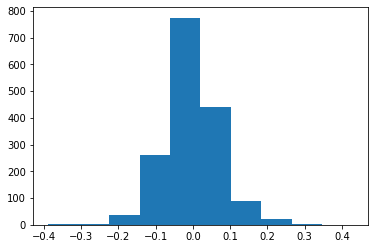

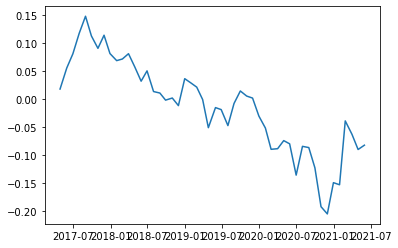

In [ ]:
value_df = df[(df.per < 10) & (df.roe > 0.1)]       # 割安でクオリティが高い銘柄を抽出

plt.hist(value_df["rt"])                            # ヒストグラムの描画
plt.show()

balance = value_df.groupby(level=0).mean().cumsum() # 累積リターンを作成

plt.clf()
plt.plot(balance["rt"])                             # バランスカーブの描画
plt.show()

# 最後に
本記事で示した検証は、まだまだ計量的・実証的なトレーディングの入り口に過ぎません。この記事には「成功する投資」と銘打っていますが、実際にこの記事を読んで投資で成功する方は殆どいないでしょう。それは、記事を読んで頂いた方の大多数が行動にまで移すことがないからです。ここでいう行動とは、単にこの記事を読んで付け焼刃のトレーディングを行うことではなく、この記事から受けたインスピレーションを元に自らが創意工夫して計量的・実証的なトレーディングの検証を行うまでに至ることを指します。

この記事はできるだけ分かりやすくまとめていますが、それでも読者の方が単に記事を読んだだけでは、その過程に生じた細かで有用な知見を決して理解することはできません。これを自身のものにするためには、自分自身が手を動かすしかないのです。

筆者はこれまでにトレーディングに関する自身の知見をブログやnoteに書き綴ってきました。この記事を読んで、もしも読者の方が計量的・実証的なトレーディングに本気で取り組もうと考えているのであれば、以下の参考記事が必ずその道標になるでしょう。

繰り返しになりますが、トレーディングはその殆どが運で決まります。筆者がこれまで好成績を収めてこれたのも、そのパフォーマンスが運よく下振れすることがなかったからです。あなたにも幸運のご加護がありますように。